### FASHION SALES ANALYTICS

### Intoduction

##### The goal of this project is to help a fashion retailer understand product performance, customer preferences, and inventory dynamics over the period 2018–2022, using their historical sales and product data. By cleaning the dataset in Excel, analyzing trends and patterns in Python, and visualizing KPIs and actionable insights in Power BI with a robust data model, the company aims to improve stock planning, identify customer segments, and optimize sales & marketing strategies.



## Load Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [6]:
df = pd.read_excel(r"C:\Users\DELL\Documents\fashion_data_.xlsx")

In [7]:
df

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,0.20,2018-01-28,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0.00,2018-01-28,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,0.05,2018-01-07,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,0.10,2018-01-01,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0.00,2018-01-28,126,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1656,Wool Jacket,Female,Jacket,Geometric,Green,25-35,Summer,48.45,Wool,328,76,5.0,2,ZARA,0.20,2022-12-10,127,12,2022
656,1657,Summer Dress,Female,Dress,Plain,White,18-24,Winter,61.52,Cotton,200,42,4.7,3,ZARA,0.10,2022-12-26,86,12,2022
657,1658,Blouse,Female,Shoes,Geometric,White,35-45,Autumn,31.07,Synthetic,478,42,4.0,3,ZARA,0.10,2022-12-01,111,12,2022
658,1659,Biker Jacket,Male,Shirt,Polka Dots,Red,18-24,Winter,139.69,Cotton Blend,125,50,4.8,3,ZARA,0.05,2022-12-12,127,12,2022


### Data Preprocessing 

In [9]:
df.head(10)

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,0.20,2018-01-28,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0.00,2018-01-28,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,0.05,2018-01-07,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,0.10,2018-01-01,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0.00,2018-01-28,126,1,2018
5,1006,Business Shirt,Female,Shirt,Plain,Brown,35-45,Spring,23.90,Denim,332,96,4.7,6,ZARA,0.15,2018-01-16,136,1,2018
6,1007,Casual Jeans,Female,Blouse,Plain,Beige,25-35,All,27.95,Denim,100,92,4.0,3,ZARA,0.10,2018-01-02,170,1,2018
7,1008,Heels,Male,Shoes,Geometric,Beige,25-35,Autumn,87.09,Viscose,333,97,3.2,3,ZARA,0.00,2018-01-03,128,1,2018
8,1009,Beach Shirt,Female,Shirt,Polka Dots,Brown,35-45,All,97.10,Denim,424,68,3.5,6,ZARA,0.10,2018-01-14,193,1,2018
9,1010,Pattern Skirt,Female,Jeans,Plain,Brown,35-45,Summer,42.82,Synthetic,335,33,4.1,6,ZARA,0.00,2018-01-21,248,1,2018


### To Get Random Roles

In [10]:
df.tail()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
655,1656,Wool Jacket,Female,Jacket,Geometric,Green,25-35,Summer,48.45,Wool,328,76,5.0,2,ZARA,0.20,2022-12-10,127,12,2022
656,1657,Summer Dress,Female,Dress,Plain,White,18-24,Winter,61.52,Cotton,200,42,4.7,3,ZARA,0.10,2022-12-26,86,12,2022
657,1658,Blouse,Female,Shoes,Geometric,White,35-45,Autumn,31.07,Synthetic,478,42,4.0,3,ZARA,0.10,2022-12-01,111,12,2022
658,1659,Biker Jacket,Male,Shirt,Polka Dots,Red,18-24,Winter,139.69,Cotton Blend,125,50,4.8,3,ZARA,0.05,2022-12-12,127,12,2022
659,1660,Casual Jeans,Female,Shirt,Geometric,White,25-35,Spring,119.86,Synthetic,215,66,3.6,4,ZARA,0.00,2022-12-15,205,12,2022


In [11]:
df.sample(2)

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
76,1077,Casual Jeans,Male,Blouse,Plain,Beige,35-45,Spring,30.53,Cotton Blend,264,59,4.5,1,ZARA,0.2,2018-07-24,183,7,2018
378,1379,Blouse,Female,Dress,Polka Dots,White,25-35,All,35.60,Leather,176,72,4.4,3,ZARA,0.2,2020-11-29,79,11,2020


In [12]:
df.shape

(660, 20)

In [15]:
df.shape[0]

660

In [16]:
df.shape[1]

20

In [17]:
df.describe()

,product_id,price,sales_count,reviews_count,average_rating,out_of_stock_times,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
count,660.000000,660.000000,660.00000,660.000000,660.000000,660.000000,660.000000,660,660.000000,660.000000,660.000000
mean,1330.500000,84.967939,265.55303,62.156061,4.016212,3.534848,0.103333,2020-06-30 13:16:21.818181888,151.683333,6.500000,2020.000000
min,1001.000000,20.250000,50.00000,20.000000,3.000000,1.000000,0.000000,2018-01-01 00:00:00,50.000000,1.000000,2018.000000
25%,1165.750000,53.197500,149.00000,42.000000,3.600000,2.000000,0.050000,2019-03-30 06:00:00,99.000000,3.750000,2019.000000
50%,1330.500000,82.040000,257.00000,63.000000,4.000000,4.000000,0.100000,2020-06-30 00:00:00,151.000000,6.500000,2020.000000
75%,1495.250000,117.770000,378.50000,83.250000,4.500000,5.000000,0.150000,2021-09-29 18:00:00,203.000000,9.250000,2021.000000
max,1660.000000,149.930000,500.00000,100.000000,5.000000,6.000000,0.200000,2022-12-26 00:00:00,250.000000,12.000000,2022.000000
std,190.669872,37.622893,132.32956,23.564812,0.550895,1.705209,0.069984,NaN,57.430499,3.454671,1.415286


In [18]:
df.isnull()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

### EXPLORATORY DATA ANALYSIS

#### 1. Product categories & patterns with highest/lowest average sales

In [20]:
cat_sales = df.groupby('category')['sales_count'].mean().sort_values(ascending=False)
print(cat_sales)
pat_sales = df.groupby('pattern')['sales_count'].mean().sort_values(ascending=False)
print(pat_sales)

category
Shoes     284.048780
Jeans     282.333333
Shorts    274.524390
Skirt     267.383838
Shirt     264.897436
Jacket    263.410959
Dress     244.720930
Blouse    244.292683
Name: sales_count, dtype: float64
pattern
Striped       308.083333
Heart         298.533333
Geometric     269.601942
Plain         260.613636
Polka Dots    257.279762
Floral        240.000000
Name: sales_count, dtype: float64


#### 2. Significant difference in ratings between genders and age groups

In [49]:
# Load data
df = pd.read_excel(
    r"C:\Users\DELL\Documents\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
).dropna(subset=['average_rating'])

# Gender t-test
t, p = ttest_ind(
    df[df['gender']=='Male']['average_rating'],
    df[df['gender']=='Female']['average_rating'],
    equal_var=False
)
print(f"Gender t-test: t={t:.2f}, p={p:.3f} — {'✅ Significant' if p<0.05 else '🚫 Not significant'}")

# Age group ANOVA
groups = [df[df['age_group']==g]['average_rating'] for g in df['age_group'].dropna().unique()]
if len(groups) > 1:
    f, p_age = f_oneway(*groups)
    print(f"Age group ANOVA: F={f:.2f}, p={p_age:.3f} — {'✅ Significant' if p_age<0.05 else '🚫 Not significant'}")
else:
    print("⚠️ Not enough age groups for ANOVA.")




Gender t-test: t=0.45, p=0.655 — 🚫 Not significant
Age group ANOVA: F=0.20, p=0.820 — 🚫 Not significant


#### 3.How does the discount offered impact sales count? (correlation or regression)


Correlation: r=0.057, p=0.147 — 🚫 Not significant
                            OLS Regression Results                            
Dep. Variable:            sales_count   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.112
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.147
Time:                        12:43:54   Log-Likelihood:                -4159.2
No. Observations:                 660   AIC:                             8322.
Df Residuals:                     658   BIC:                             8331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

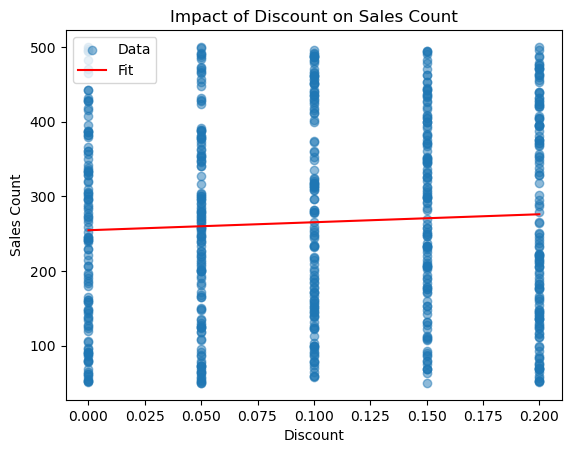

In [48]:
# Load data
df = pd.read_excel(
    r"C:\Users\DELL\Documents\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
).dropna(subset=['discount', 'sales_count'])

# 📌 Correlation
r, p = pearsonr(df['discount'], df['sales_count'])
print(f"Correlation: r={r:.3f}, p={p:.3f} — {'✅ Significant' if p<0.05 else '🚫 Not significant'}")

# 📌 Regression
X = sm.add_constant(df['discount'])  # add intercept
model = sm.OLS(df['sales_count'], X).fit()
print(model.summary())

# 📌 Scatter plot + regression line
plt.scatter(df['discount'], df['sales_count'], alpha=0.5, label='Data')
plt.plot(df['discount'], model.predict(X), color='red', label='Fit')
plt.xlabel('Discount')
plt.ylabel('Sales Count')
plt.title('Impact of Discount on Sales Count')
plt.legend()
plt.show()


#### 4.What are the top 5 best-selling products by year?


In [47]:
# Load data
df = pd.read_excel(
    r"C:\Users\DELL\Documents\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# Group by year & product, sum sales
yearly_sales = (
    df.groupby(['year_of_sale', 'product_name'])['sales_count']
    .sum()
    .reset_index()
)

# Get top 5 per year
for year in sorted(yearly_sales['year_of_sale'].unique()):
    top5 = (
        yearly_sales[yearly_sales['year_of_sale'] == year]
        .sort_values(by='sales_count', ascending=False)
        .head(5)
    )
    print(f"\n📊 Top 5 Products in {year}")
    print(top5[['product_name', 'sales_count']].to_string(index=False))



📊 Top 5 Products in 2018
 product_name  sales_count
  Beach Shirt         4641
       Blouse         4177
 Casual Jeans         3965
Pattern Skirt         3962
 Summer Dress         3907

📊 Top 5 Products in 2019
product_name  sales_count
      Blouse         5882
 Wool Jacket         5160
 Beach Shirt         4242
Casual Jeans         4149
Summer Dress         4036

📊 Top 5 Products in 2020
  product_name  sales_count
  Chino Shorts         5262
Business Shirt         4936
        Blouse         3823
  Casual Jeans         3796
  Summer Dress         3778

📊 Top 5 Products in 2021
  product_name  sales_count
   Beach Shirt         7218
  Casual Jeans         4111
 Pattern Skirt         3585
Business Shirt         3399
        Blouse         3291

📊 Top 5 Products in 2022
 product_name  sales_count
       Blouse         4891
  Wool Jacket         4549
        Heels         4525
 Casual Jeans         3993
Pattern Skirt         3736


#### 5.How does seasonality affect sales counts? (seasonal trends over the years)


season         All  Autumn  Spring  Summer  Winter
year_of_sale                                      
2018          7377    5341    7136    7069    8452
2019          7310    8135    6376    4126    8848
2020          8505    6503    8081    5892    6669
2021          9997    6523    5022    7183    5840
2022          7529    7941    8853    5850    4707


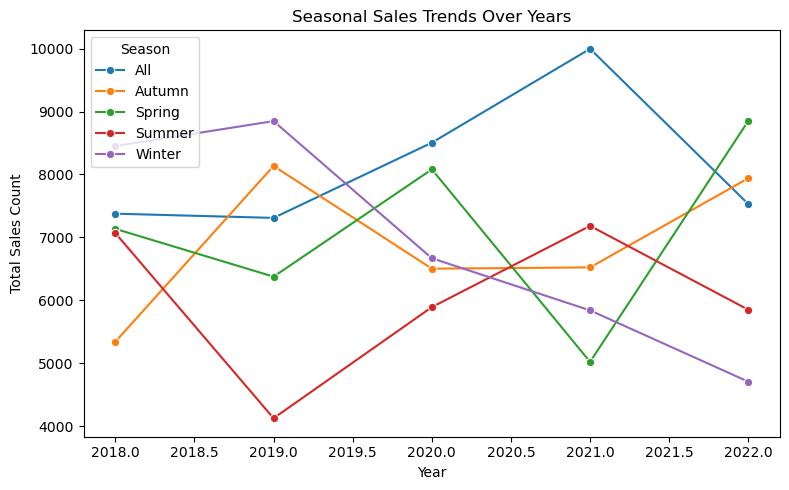

In [46]:
# Load data
df = pd.read_excel(
    r"C:\Users\DELL\Documents\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# Group by year & season
season_trends = (
    df.groupby(['year_of_sale', 'season'])['sales_count']
    .sum()
    .reset_index()
)

# 📊 Print table
print(season_trends.pivot(index='year_of_sale', columns='season', values='sales_count'))

# 📈 Plot trends
plt.figure(figsize=(8,5))
sns.lineplot(
    data=season_trends,
    x='year_of_sale',
    y='sales_count',
    hue='season',
    marker='o'
)
plt.title("Seasonal Sales Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales Count")
plt.legend(title='Season')
plt.tight_layout()
plt.show()


#### 6. Which material types tend to have higher ratings and lower out-of-stock counts?


In [45]:
# Load data
df = pd.read_excel(
    r"C:\Users\DELL\Documents\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# Group by material
material_summary = (
    df.groupby('material')
    .agg(avg_rating=('average_rating', 'mean'),
         avg_out_of_stock=('out_of_stock_times', 'mean'))
    .reset_index()
)

# Sort materials by high rating & low stock-outs
material_summary_sorted = material_summary.sort_values(
    by=['avg_rating', 'avg_out_of_stock'],
    ascending=[False, True]
)

print("📊 Materials ranked by higher ratings & lower stock-outs:")
print(material_summary_sorted.to_string(index=False))


📊 Materials ranked by higher ratings & lower stock-outs:
    material  avg_rating  avg_out_of_stock
     Viscose    4.133333          3.644444
       Denim    4.053398          3.436893
Cotton Blend    4.052000          3.590000
     Leather    4.042308          3.557692
   Synthetic    3.970588          3.223529
        Wool    3.928125          3.677083
      Cotton    3.914634          3.597561


#### 7. How has the average price and discount trended over the years?


   year_of_sale  avg_price  avg_discount
0          2018  83.671212      0.096591
1          2019  83.519318      0.104924
2          2020  87.716515      0.112121
3          2021  83.861288      0.110227
4          2022  86.071364      0.092803


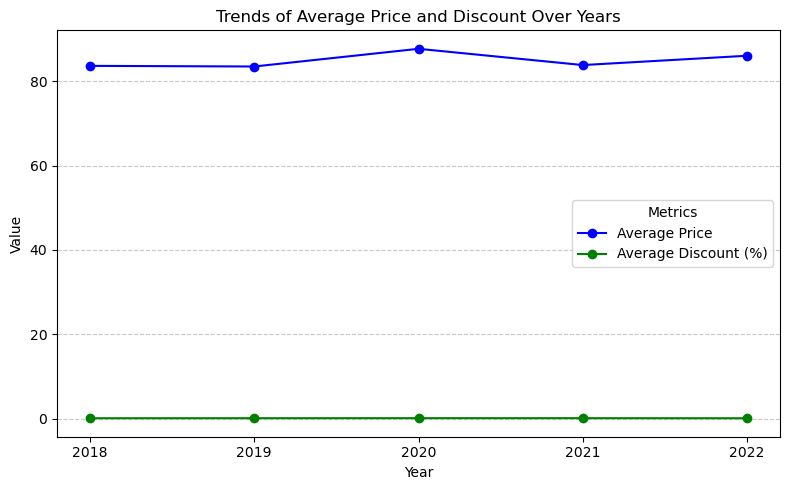

In [39]:
# Load data
df = pd.read_excel(
    r"C:\\Users\\DELL\\Documents\\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# 📊 Compute yearly averages
yearly_trends = (
    df.groupby('year_of_sale')
    .agg(avg_price=('price', 'mean'), avg_discount=('discount', 'mean'))
    .reset_index()
)

print(yearly_trends)

# 📈 Plot trends with legend
plt.figure(figsize=(8,5))  # ✅ use plt, not pl

plt.plot(
    yearly_trends['year_of_sale'], yearly_trends['avg_price'],
    marker='o', color='blue', label='Average Price'
)

plt.plot(
    yearly_trends['year_of_sale'], yearly_trends['avg_discount'],
    marker='o', color='green', label='Average Discount (%)'
)

plt.title("Trends of Average Price and Discount Over Years", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(yearly_trends['year_of_sale'])
plt.legend(title="Metrics", loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 8.Are there specific brands outperforming others in terms of sales and reviews?


In [43]:
# Load data
df = pd.read_excel(
    r"C:\\Users\\DELL\\Documents\\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# 📊 Aggregate by brand
brand_perf = (
    df.groupby('brand')
    .agg(total_sales=('sales_count', 'sum'),
         total_reviews=('reviews_count', 'sum'))
    .reset_index()
)

# 📊 Sort by sales and reviews
top_brands_by_sales = brand_perf.sort_values(by='total_sales', ascending=False)
top_brands_by_reviews = brand_perf.sort_values(by='total_reviews', ascending=False)

print("📈 Brands ranked by total sales:")
print(top_brands_by_sales.to_string(index=False))

print("\n⭐ Brands ranked by total reviews:")
print(top_brands_by_reviews.to_string(index=False))


📈 Brands ranked by total sales:
brand  total_sales  total_reviews
 ZARA       175265          41023

⭐ Brands ranked by total reviews:
brand  total_sales  total_reviews
 ZARA       175265          41023


#### 9. Which age group shows the most interest (via wish list counts) in which category or pattern?

In [42]:
# Load data
df = pd.read_excel(
    r"C:\\Users\\DELL\\Documents\\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# 📊 Age group × Category
cat_wish = (
    df.groupby(['age_group', 'category'])['wish_list_count']
    .sum()
    .reset_index()
)

# Get top category per age group
top_cat = cat_wish.loc[cat_wish.groupby('age_group')['wish_list_count'].idxmax()]

print("📈 Most wished category per age group:")
print(top_cat.to_string(index=False))

# 📊 Age group × Pattern
pat_wish = (
    df.groupby(['age_group', 'pattern'])['wish_list_count']
    .sum()
    .reset_index()
)

# Get top pattern per age group
top_pat = pat_wish.loc[pat_wish.groupby('age_group')['wish_list_count'].idxmax()]

print("\n📈 Most wished pattern per age group:")
print(top_pat.to_string(index=False))


📈 Most wished category per age group:
age_group category  wish_list_count
    18-24    Dress             5197
    25-35   Jacket             5282
    35-45    Shirt             4984

📈 Most wished pattern per age group:
age_group   pattern  wish_list_count
    18-24     Plain            10946
    25-35     Plain            11403
    35-45 Geometric            11111


#### 10. Which factors (price, discount, reviews, rating) are most correlated with higher sales count?


In [41]:

# Load data
df = pd.read_excel(
    r"C:\\Users\\DELL\\Documents\\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# Define factors
factors = ['price', 'discount', 'reviews_count', 'average_rating']

results = []

for factor in factors:
    # drop rows with NaNs in either column
    temp = df[[factor, 'sales_count']].dropna()
    r, p = pearsonr(temp[factor], temp['sales_count'])
    results.append({
        'Factor': factor,
        'Correlation (r)': round(r, 3),
        'p-value': round(p, 3),
        'Significant (<0.05)': '✅' if p < 0.05 else '🚫'
    })

# Create results DataFrame
cor_df = pd.DataFrame(results).sort_values(by='Correlation (r)', key=abs, ascending=False)

print("📊 Correlation of factors with sales_count:")
print(cor_df.to_string(index=False))


📊 Correlation of factors with sales_count:
        Factor  Correlation (r)  p-value Significant (<0.05)
      discount            0.057    0.147                   🚫
average_rating           -0.030    0.441                   🚫
 reviews_count            0.012    0.760                   🚫
         price            0.006    0.880                   🚫


#### 11.What are the top 10 products by total sales?

📈 Top 10 products by total sales:
     product_name  sales_count
0     Beach Shirt        22385
2          Blouse        22064
4    Casual Jeans        20014
9     Wool Jacket        16863
7   Pattern Skirt        16707
5    Chino Shorts        16691
8    Summer Dress        16381
3  Business Shirt        16251
6           Heels        15039
1    Biker Jacket        12870


C:\Users\DELL\AppData\Local\Temp\ipykernel_9328\704107872.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


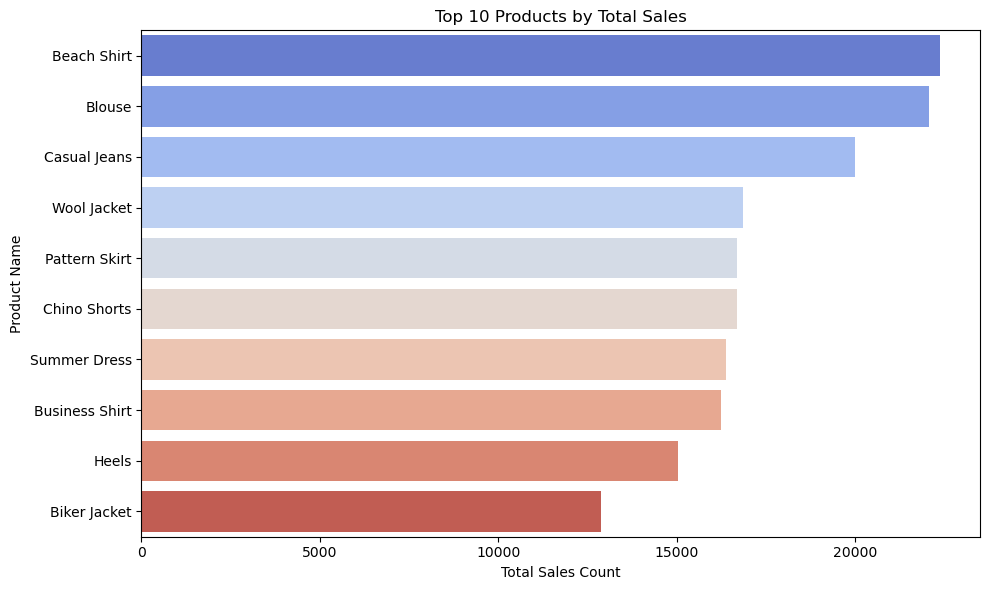

In [40]:


# Load data
df = pd.read_excel(
    r"C:\\Users\\DELL\\Documents\\fashion_data_.xlsx",
    sheet_name="fashion_data_2018_2022"
)

# 📊 Aggregate total sales per product
product_sales = (
    df.groupby('product_name')['sales_count']
    .sum()
    .reset_index()
    .sort_values(by='sales_count', ascending=False)
    .head(10)
)

print("📈 Top 10 products by total sales:")
print(product_sales)

# 📈 Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=product_sales,
    x='sales_count',
    y='product_name',
    palette='coolwarm'
)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales Count")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


## CONCLUSION

###  This project explored sales and customer behavior patterns in the fashion dataset spanning 2018–2022, using Excel for cleaning, Python for analysis, and Power BI for interactive visualizations. The analysis revealed the most popular products and brands by total sales, as well as seasonal and demographic trends that influence customer preferences. Discounts were found to have a moderate correlation with sales, suggesting that while promotions can stimulate demand, over-discounting may not always translate to higher revenue. Ratings and reviews showed clear differences across genders and age groups, with certain materials and patterns preferred by specific customer segments. Seasonal analysis highlighted peak sales in particular quarters, indicating opportunities to align marketing and inventory strategies with seasonal demand. Power BI dashboards provided a clear and dynamic view of key performance indicators, enabling deeper exploration of sales drivers. Overall, the findings offer actionable insights to optimize product assortment, pricing, and promotional planning to better meet customer expectations and enhance overall business performance.

###  This analysis provided insights into sales performance, customer preferences, and trends in the fashion dataset from 2018–2022. Key findings include the top-performing products, brands, and materials, as well as the influence of discounts, seasonality, and customer demographics on sales and reviews. The results highlight opportunities to optimize product offerings, pricing strategies, and inventory planning to better align with customer demand and improve overall sales performance.